# Grids of stellar models with rotation

Stellar models with rotation. 0.8<M<120, Z=0.014 : J/A+A/537/A146

In [1]:
import glob

In [2]:
import numpy as np
import pandas as pd

In [3]:
from astropy.constants import G, sigma_sb, M_sun, L_sun

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["image.cmap"] = "Spectral"

In [5]:
def logg(Mass, logTe, logL):
    return np.log10(4*np.pi*G.value*sigma_sb.value)\
         + np.log10(Mass*M_sun.value)\
         + 4*logTe \
         - logL \
         - np.log10(L_sun.value)

In [6]:
tab_files = sorted(glob.glob("models/files/tab*n.dat"))
tab_names = ["Line", "Time", "Mass", "logL", "logTe", "X", "Y",
             "C12", "C13", "N14", "O16", "O17", "O18", "Ne20", "Ne22", "Al26", "QCC",
             "logTe.u", "logdM/dt", "log(rhoc)", "logTc", "Xc", "Yc", "C12c", "C13c",
             "N14c", "O16c", "O17c", "O18c", "Ne20c", "Ne22c", "Al26c", "Omegas", "Omegac",
             "oblat", "dM/dtR", "vcrit1", "vcrit2", "veq", "OOc", "Gedd", "dM/dtm", "Ltot"]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


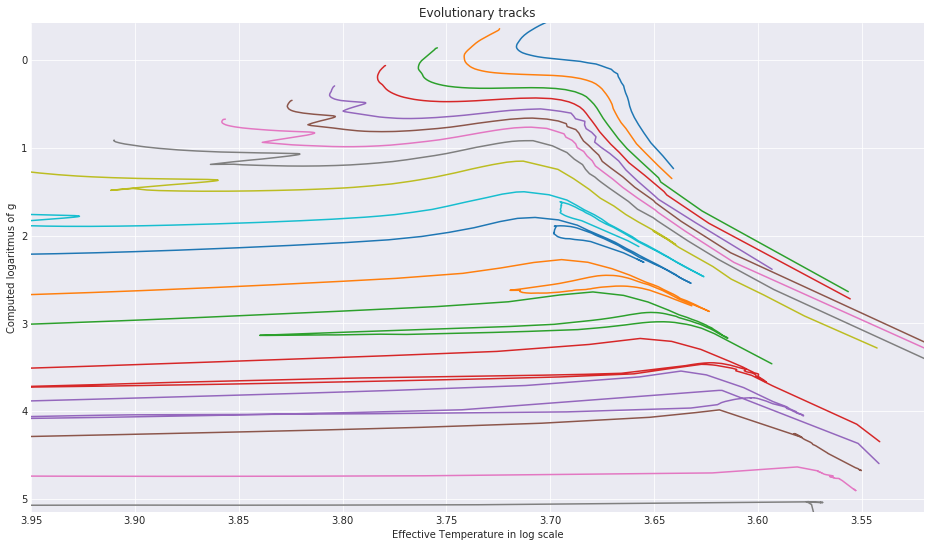

In [9]:
plt.title("Evolutionary tracks")
plt.xlabel("Effective Temperature in log scale")
plt.ylabel("Computed logaritmus of g")
for tab in tab_files:
    data = pd.read_table(tab, sep="\s+", names=tab_names)
    data["logg"] = logg(data["Mass"], data["logTe"], data["logL"])
    plt.plot(data["logTe"], data["logL"])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim([3.95, 3.52]);
plt.ylim([5.15,-0.42]);

In [10]:
iso_files = sorted(glob.glob("models/files/iso*n.dat"))
iso_names = ["Mini", "Zini", "OOcini", "Mass", "logL", "logTe", "logTe.nc",
             "Mbol", "Vmag", "U-B", "B-V", "B2-V1", "Rpol", "oblat", "logg", "Oms", "Veq",
             "vcrit1", "vcrit2", "OOc", "logdM/dtr", "logdM/dtm", "Gedd", "H1", "He4",
             "C12", "C13", "N14", "O16", "O17", "O18", "Ne20", "Ne22", "Al26"]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


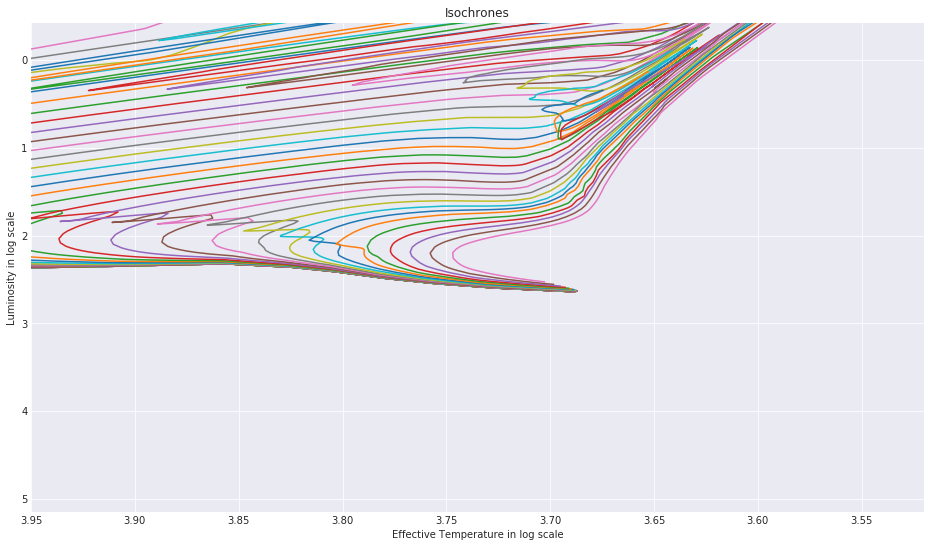

In [11]:
plt.title("Isochrones")
plt.xlabel("Effective Temperature in log scale")
plt.ylabel("Luminosity in log scale")
for iso in iso_files:
    data = pd.read_table(iso, sep="\s+", names=iso_names)
    data["logg"] = logg(data["Mass"], data["logTe"], data["logL"])
    plt.plot(data["logTe"], data["logg"])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim([3.95, 3.52]);
plt.ylim([5.15,-0.42]);